In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils

from nn.neural_network import NeuralNetwork
from nn.layers import Input, Convolutional, Reshape, Dense

In [2]:
def preprocess_data(x, y, limit):
    indexes = []
    n = 10
    for i in range(n):
        indexes.append(np.where(y == i)[0][:limit])

    all_indices = np.hstack(indexes)
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = np_utils.to_categorical(y)
    y = y.reshape(len(y), n, 1)
    return x, y

In [3]:
# get dataset and split it into two datasets (training, testing)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# preprocessing the data
x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 20)

# set of images
images = x_test.copy()

In [4]:
# build the convolutional neural network
model = NeuralNetwork(loss_f='MSE')

# adding layers
model.add_layer(Input(input_shape=x_train.shape[1:]))
model.add_layer(Convolutional(kernel_size=3, depth=3, act_f='sigmoid'))
model.add_layer(Convolutional(kernel_size=3, depth=2, act_f='sigmoid'))
model.add_layer(Convolutional(kernel_size=6, depth=1, act_f='sigmoid'))
model.add_layer(Reshape())
model.add_layer(Dense(n_neur=40, act_f='sigmoid'))
model.add_layer(Dense(n_neur=10, act_f='sigmoid'))

# get the summary of the model
model.summary()

,Type,Activation Function,Input Shape,Output Shape
0,Input,None,None,"(1, 28, 28)"
1,Convolutional,Sigmoid,"(1, 28, 28)","(3, 26, 26)"
2,Convolutional,Sigmoid,"(3, 26, 26)","(2, 24, 24)"
3,Convolutional,Sigmoid,"(2, 24, 24)","(1, 19, 19)"
4,Reshape,None,"(1, 19, 19)","(361, 1)"
5,Dense,Sigmoid,"(361, 1)","(40, 1)"
6,Dense,Sigmoid,"(40, 1)","(10, 1)"


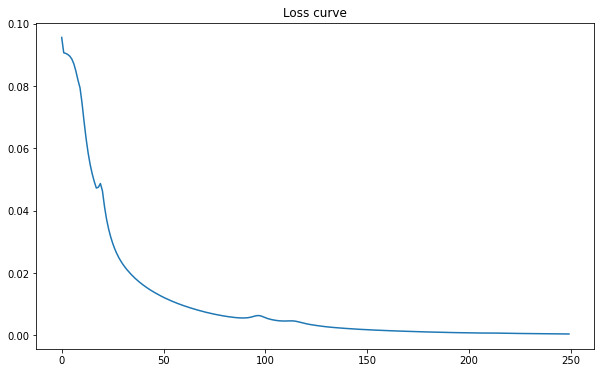

In [5]:
# training
loss = model.fit(x_train, y_train, epochs=250, lr=0.04)

# plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(list(range(len(loss))), loss)
plt.title('Loss curve')
plt.show()

In [6]:
# evaluation
yp = model.predict(x_test)
count = 0
for i in range(len(yp)):
    pred = np.argmax(yp[i])
    true = np.argmax(y_test[i])
    if pred == true: count = count + 1

# print accuracy value
print(f'Accuracy: {count / len(yp) * 100}%')

Accuracy: 87.5%


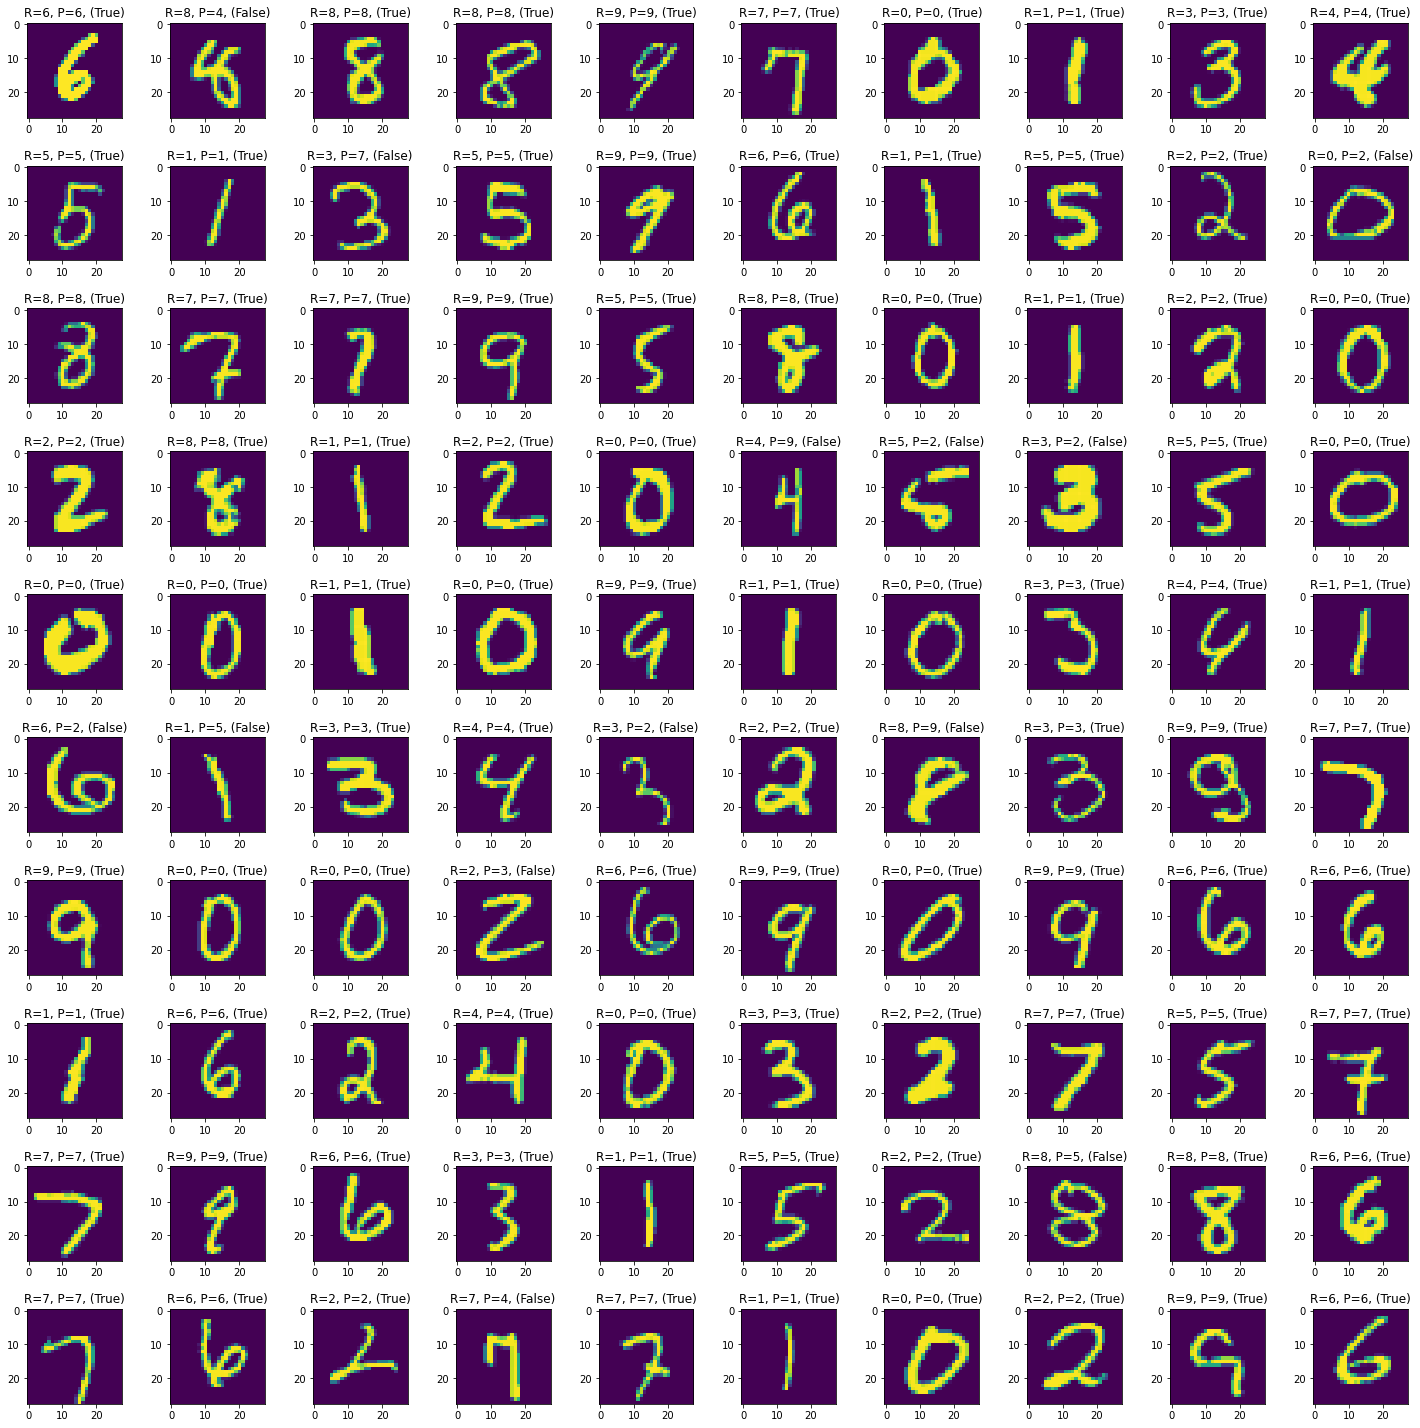

In [7]:
# show images (P = predicted class, R = Real class)
fig, axes = plt.subplots(10,10, figsize=(20,20))
fig.tight_layout()
for i,ax in enumerate(axes.flat):
    ax.imshow(images[i][0])
    ax.title.set_text(f'R={np.argmax(y_test[i])}, P={np.argmax(yp[i])}, ({np.argmax(yp[i]) == np.argmax(y_test[i])})')